In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


In [2]:
print (tf.__version__)

2.7.0


In [3]:
#load fashion MNIST 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
# strings for each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocess the data

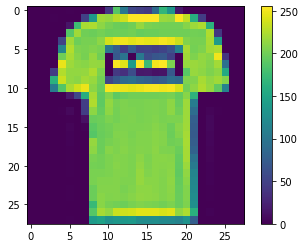

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [21]:
# build figure
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Build the model 

A 28 x 28 image is transformed to a flattened array and feed into two densly connected neural netoworks(NNs) and finally ends up with 10 logits, each of which has a value from 0.0 to 1.0. 

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-09-09 11:09:22.638144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 47220 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:67:00.0, compute capability: 7.5
2021-09-09 11:09:22.639585: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46453 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:68:00.0, compute capability: 7.5


In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Feed the model 

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3078 - accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accuracy: 0.9109
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2308 - accuracy: 0.9137
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2202 - accuracy: 0.9169
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2130 - accuracy: 0.9188
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2063 - accuracy: 0.9227
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2012 - accuracy: 0.9244
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1937 - accuracy: 0.9271
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1889 - accuracy: 0.9285
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.182

# Evaluate accuracy

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

313/313 - 1s - loss: 0.3778 - accuracy: 0.8824 - 862ms/epoch - 3ms/step

Test accuracy 0.8823999762535095


# Make prediction 

In [35]:
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [36]:
predictions = prob_model.predict(test_images)

In [41]:
predictions.shape


(10000, 10)

In [42]:
predictions[0]

array([1.06595854e-09, 3.59997830e-11, 6.18924874e-14, 6.67093171e-13,
       1.15696515e-10, 9.43640771e-06, 6.93134855e-11, 3.05086747e-03,
       1.90922123e-09, 9.96939659e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

 # Class prediction figures

In [68]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label  = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

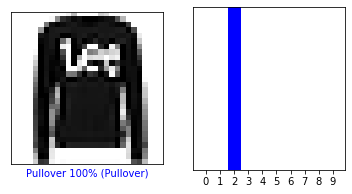

In [72]:
i =1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

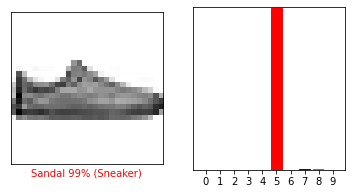

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

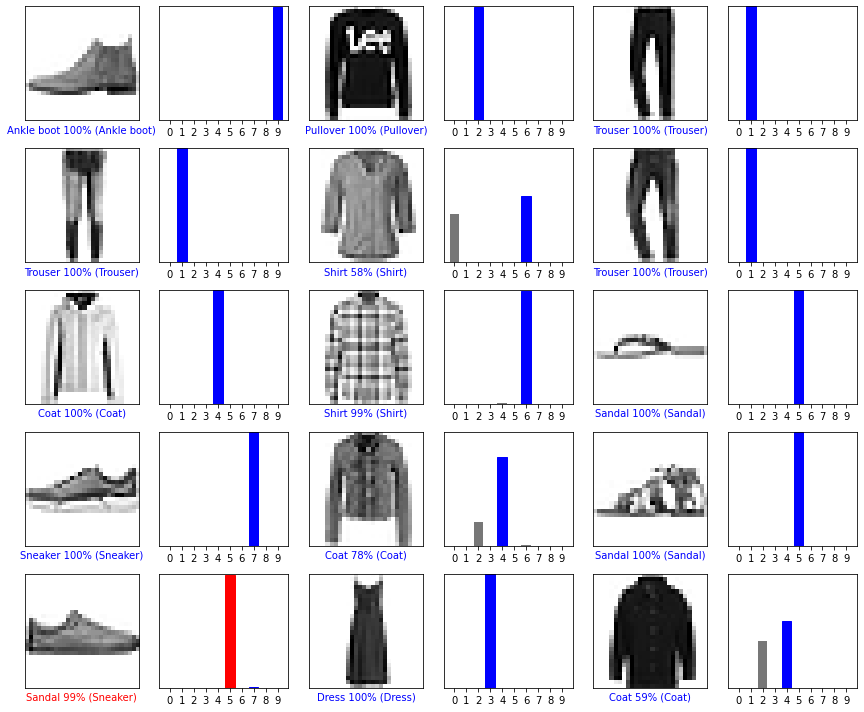

In [75]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  #subplot(nrows, ncols, index, **kwargs)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [77]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [78]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [80]:
predictions_single = prob_model.predict(img)

print(predictions_single)

[[4.1981222e-04 2.8803908e-17 9.9876571e-01 6.2263644e-13 7.4662681e-04
  3.5316290e-12 6.7855493e-05 1.7892944e-17 3.8099645e-13 3.3465581e-15]]


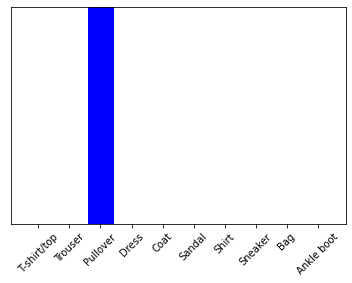

In [81]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [82]:
np.argmax(predictions_single[0])

2